<a href="https://colab.research.google.com/github/GowthamNats/email-spam-classifier/blob/main/SMSspamClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5524,spam,You are awarded a SiPix Digital Camera! call 0...,NaN,NaN,NaN
4378,ham,How are you. Just checking up on you,NaN,NaN,NaN
3511,ham,Already one guy loving you:-.,NaN,NaN,NaN
2219,spam,You have WON a guaranteed å£1000 cash or a å£2...,NaN,NaN,NaN
2088,spam,Well done ENGLAND! Get the official poly ringt...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

## Data Cleaning

In [ ]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [ ]:
# Drop last three colums
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.sample(5)

,v1,v2
5025,spam,Ur cash-balance is currently 500 pounds - to m...
296,ham,Unless it's a situation where YOU GO GURL woul...
549,ham,Ok give me 5 minutes I think I see her. BTW yo...
3371,ham,And now electricity just went out fml.
1705,ham,Yun ah.now Ì_ wkg where?btw if Ì_ go nus sc. Ì...


In [ ]:
# Rename columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
1299,ham,Great to hear you are settling well. So what's...
4480,ham,No..its ful of song lyrics..
4796,spam,Santa calling! Would your little ones like a c...
4065,ham,Fyi I'm gonna call you sporadically starting a...
798,ham,Ok i msg u b4 i leave my house.


In [ ]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
# Label Encode the target
df['target'] = encoder.fit_transform(df['target'])
df.sample(5)

,target,text
2008,0,See the forwarding message for proof
3962,0,If you ask her or she say any please message.
4315,0,"I can't speak, bcaz mobile have problem. I can..."
2545,0,So are you guys asking that i get that slipper...
1864,0,You call him now ok i said call him


In [ ]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# duplicate value detection
df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates(keep='first')
df.sample(5)

,target,text
4224,0,\The world suffers a lot... Not because of the...
1521,0,Are you angry with me. What happen dear
2745,0,R Ì_ going 4 today's meeting?
5019,0,"It's cool, we can last a little while. Getting..."
933,0,What time you think you'll have it? Need to kn...


## EDA

In [ ]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

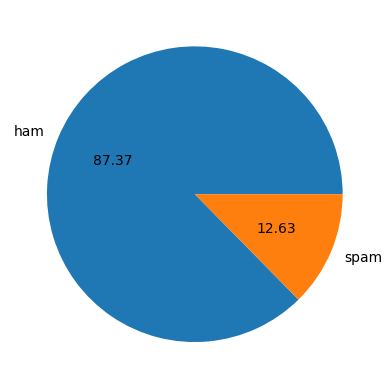

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Number of characters
df['num_characters'] = df['text'].apply(len)
df.sample(5)

<ipython-input-109-96a8bb31953e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


,target,text,num_characters
3523,0,Yeah that'd pretty much be the best case scenario,49
312,0,He says he'll give me a call when his friend's...,119
2372,0,Watching tv lor... Y she so funny we bluff her...,103
2290,0,"HEY THERE BABE, HOW U DOIN? WOT U UP 2 2NITE L...",58
3428,0,I don't know jack shit about anything or i'd s...,193


In [ ]:
# Number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

<ipython-input-110-e805ab6e449e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words
4327,1,Congrats! 2 mobile 3G Videophones R yours. cal...,161,36
3901,0,"Right on brah, see you later",28,7
2368,0,If you r @ home then come down within 5 min,43,11
3334,0,"Sorry, got a late start, we're on the way",41,12
2732,0,How dare you stupid. I wont tell anything to y...,82,22


In [ ]:
# Number of sentences
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.sample(5)

<ipython-input-111-428513078ba7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sent
5398,0,Hi. Hope you had a good day. Have a better night.,49,14,3
2005,0,Can't take any major roles in community outrea...,62,13,2
1726,0,\ALRITE HUNNY!WOT U UP 2 2NITE? DIDNT END UP G...,131,34,3
5212,0,K.k.how is your business now?,29,6,1
2417,0,Oh... Lk tt den we take e one tt ends at cine ...,81,21,1


In [ ]:
df.describe()

,target,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

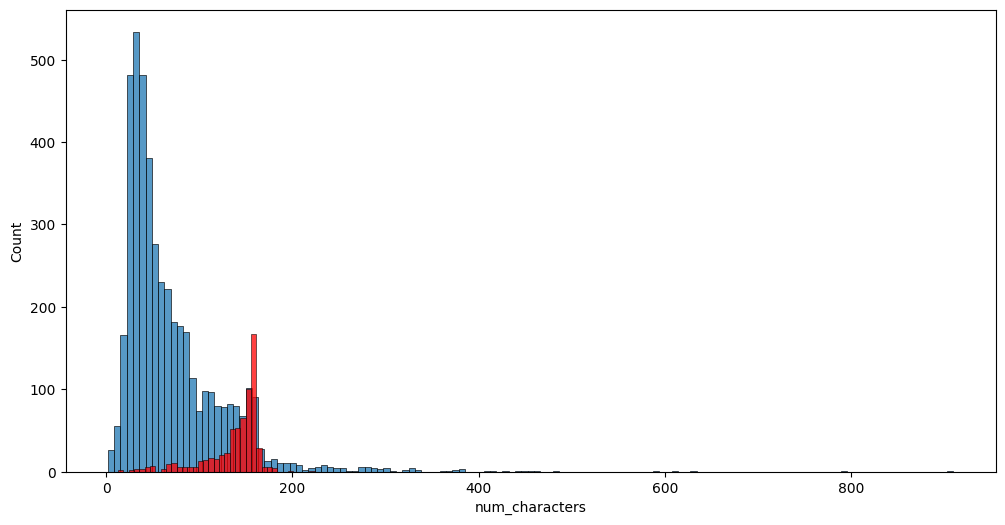

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

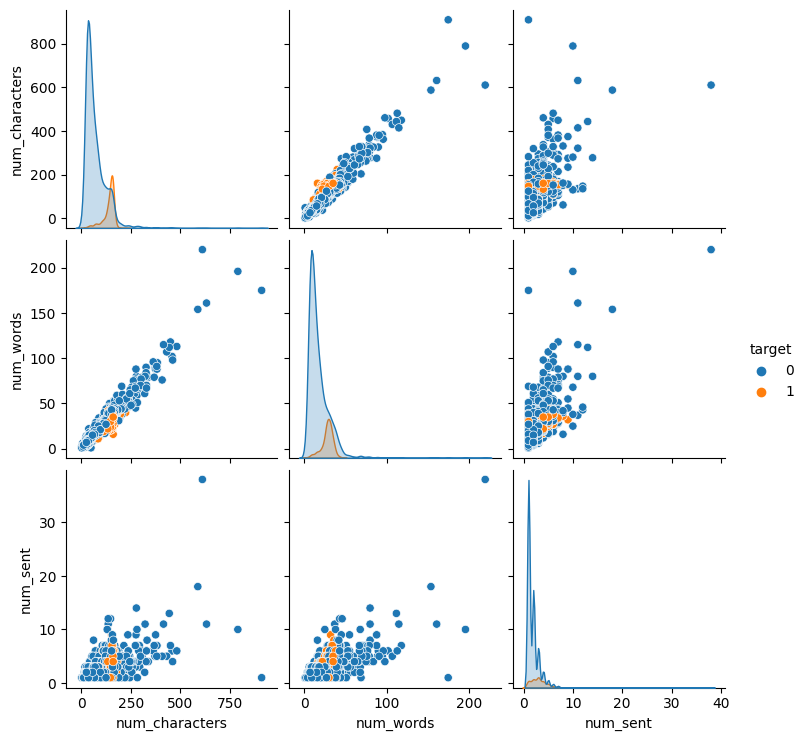

In [ ]:
sns.pairplot(df, hue='target')

<ipython-input-116-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

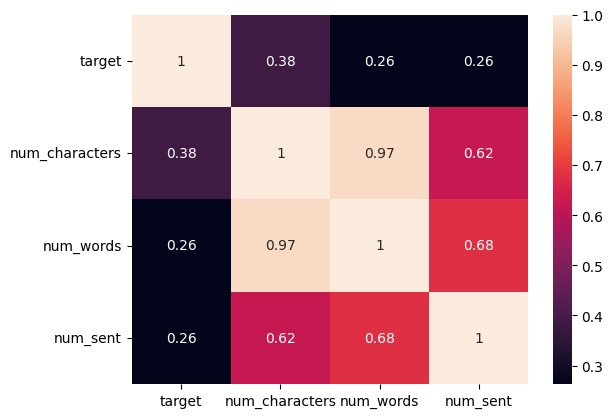

In [ ]:
sns.heatmap(df.corr(), annot=True)

## Text Preprocessing

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
ps = PorterStemmer()

import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def transform_text(text):
  # Lower Case
  text = text.lower()

  # Tokenization
  text = nltk.word_tokenize(text)

  # Remove special characters
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  # Remove stopwords and punctuations
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  # Stemmer
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
# Apply transformation
df['transformed_text'] = df['text'].apply(transform_text)
df.sample(5)

<ipython-input-119-5086d6fcf3af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


,target,text,num_characters,num_words,num_sent,transformed_text
192,0,Hi :)finally i completed the course:),37,10,1,hi final complet cours
2973,0,"I'll text carlos and let you know, hang on",42,11,1,text carlo let know hang
2777,0,Kind of. Took it to garage. Centre part of exh...,118,26,4,kind took garag centr part exhaust need replac...
5017,0,Babe ! What are you doing ? Where are you ? Wh...,152,40,8,babe talk think good boy miss love
2390,0,First has she gained more than &lt;#&gt; kg s...,191,45,3,first gain lt gt kg sinc took second done bloo...


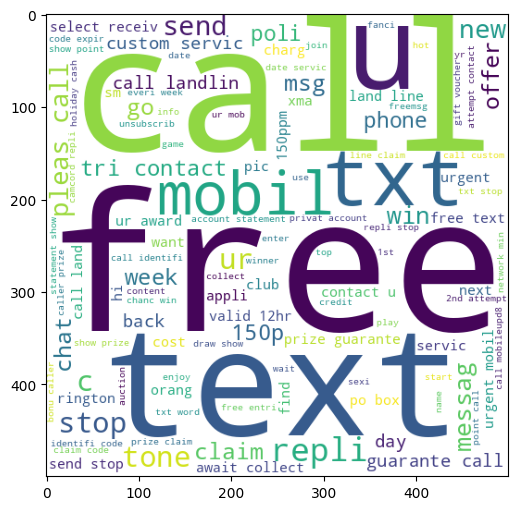

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Spam word cloud
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

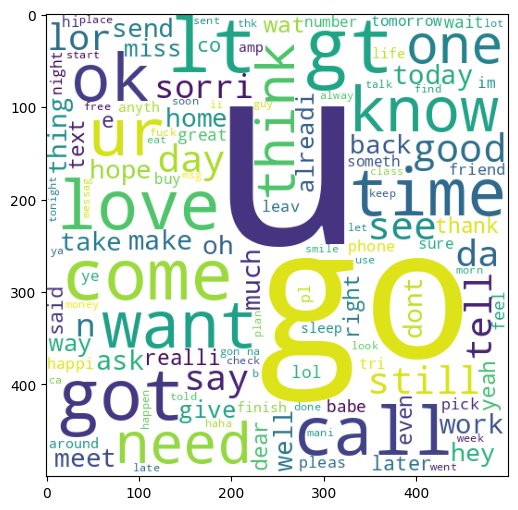

In [ ]:
# Ham word cloud
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

## Model Building

In [ ]:
# Vectorize transformed text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = tfidf.fit_transform(df['transformed_text']).toarray()
X = scaler.fit_transform(X)
Y = df['target'].values

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
# Models
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
models = [gnb, mnb, bnb]

In [ ]:
# Check out Voting and Stacking classifier
for i in models:
  i.fit(X_train, Y_train)
  Y_pred = i.predict(X_test)
  print("Accuracy: " + str(accuracy_score(Y_test, Y_pred)))
  print("Confusion Matrix: " + str(confusion_matrix(Y_test, Y_pred)))
  print("Precision: " + str(precision_score(Y_test, Y_pred)))
  print()

Accuracy: 0.8723404255319149
Confusion Matrix: [[782 114]
 [ 18 120]]
Precision: 0.5128205128205128

Accuracy: 0.9787234042553191
Confusion Matrix: [[889   7]
 [ 15 123]]
Precision: 0.9461538461538461

Accuracy: 0.9835589941972921
Confusion Matrix: [[895   1]
 [ 16 122]]
Precision: 0.991869918699187



In [ ]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(bnb, open('model.pkl', 'wb'))

In [ ]:
# # Final Code
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.naive_bayes import BernoulliNB
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# nltk.download('punkt')
# nltk.download('stopwords')

# def SMSspamClassifier(text):
#   # Cleaning
#   text = text.lower()
#   text = nltk.word_tokenize(text)

#   y = []
#   for i in text:
#     if i.isalnum():
#       y.append(i)
#   text = y[:]
#   y.clear()

#   for i in text:
#     if i not in stopwords.words('english') and i not in string.punctuation:
#       y.append(i)
#   text = y[:]
#   y.clear()

#   ps = PorterStemmer()
#   for i in text:
#     y.append(ps.stem(i))

#   # Pre-processing
#   tfidf = TfidfVectorizer(max_features=3000)
#   scaler = MinMaxScaler()

#   X = tfidf.fit_transform(text).toarray()
#   X = scaler.fit_transform(X)

#   # Prediction
#   bnb = BernoulliNB()
#   Y_pred = bnb.predict(X_test)

#   return Y_pred

In [ ]:
# SMSspamClassifier('Hey')